In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
from __future__ import print_function
import argparse
import pandas as pd
from shapely.geometry import Polygon


import sys
sys.path.insert(1, '/media/leandro/Volumen1TB1/Alt Atlas/Image_analysis/')

import src.Upload_images as ui
import src.Filtering as F
import src.Data_extraction as de
import src.Data_processing as dp
import src.plotting_visualization as pv
import src.ROI_manual_selector as rms

% of cells area: Project_Image003NC_UCMSC_P5_SS High Glucose.jpg 68.18773333333333
118
0.8209081023591012
0.658609633525634
0.8150298514836556
0.7361055266098074
0.6141959270759758
0.8024045751439794
0.7634397986030298
0.8209081023591012
0.5491855033850147
0.8150298514836556
0.2780077870676115
0.17582555392002883
0.8190725777524535
0.8162545885173853
0.8209081023591012
0.6764310144435278
0.5483490529792459
0.10416787778305729
0.3309798441990726
0.8134763063683347
0.7789998809173453
0.8319552176421404
0.6918325748559079
0.26947714625614544
0.6978193227890838
0.21961154802209926
0.8209081023591012
0.0980756499002886
0.8209081023591012
0.8209081023591012
0.5183913992790529
0.8203551467543069
0.8241471098408206
0.8209081023591012
0.05119445108263595
0.26753823807065735
0.10487179820245068
0.8209081023591012
0.6551398387173525
0.5136327857266736
0.8209081023591012
0.8209081023591012
0.323693661590558
0.4845170867910686
0.806423516080803
0.8209081023591012
0.7666242833515682
0.30523794344359

0.056610181115848535
Project_Image002 NC_UCMSC_P5_SS High Glucose.jpg 199150.5
% of cells area: Project_Image001 NC_UCMSC_P5_SS High Glucose.jpg 69.75733333333334
96
0.6834773403708566
0.701066597618476
0.7304961487819333
0.8203551467543069
0.20482839804975927
0.8203551467543069
0.8320251534895577
0.8203551467543069
0.8203551467543069
0.8209081023591012
0.14351121251854956
0.8209081023591012
0.08382424220703236
0.034794928971299745
0.8203551467543069
0.08818413557297555
0.8209081023591012
0.5443483680612035
0.811820794411073
0.33186422342388944
0.8209081023591012
0.7539822368615503
0.46124854914789837
0.8209081023591012
0.8209081023591012
0.8136744651246296
0.22567020495912576
0.6675887789606059
0.6505828928128173
0.806423516080803
0.1504323383684959
0.16157406552294784
0.8209081023591012
0.46371660201677467
0.779953198013902
0.8209081023591012
0.17127532172158663
0.08149169151584668
0.31370558325734804
0.30098550470457736
0.5110009782830682
0.2389900653056697
0.8150298514836556
0.0191

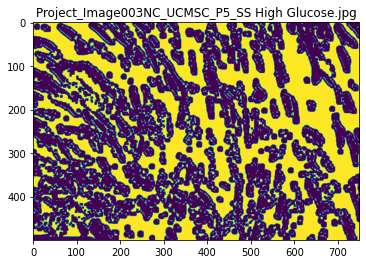

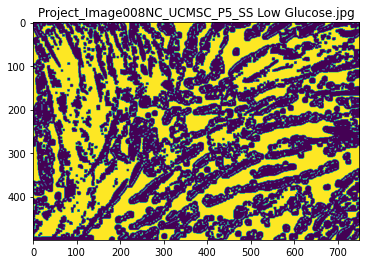

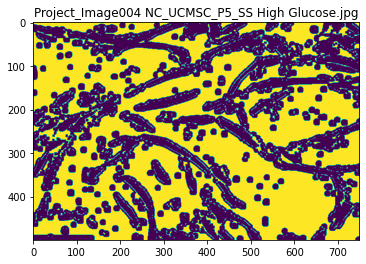

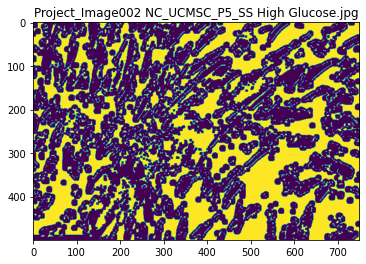

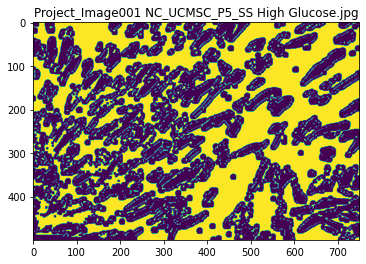

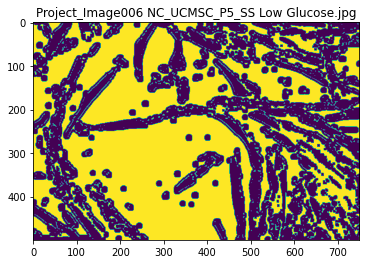

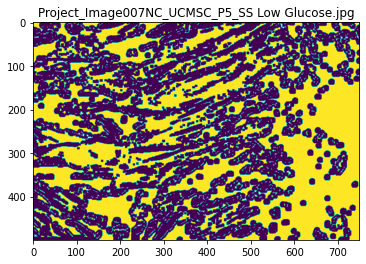

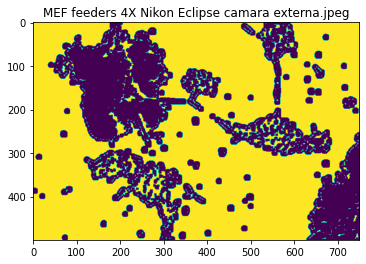

In [8]:
path = '/media/leandro/Volumen1TB1/Alt Atlas/images/Human Embryonic Stem Cells and Human Induced Pluripotent Stem Cell Images/Cells/'
arr = os.listdir(path)
for photo in arr:
    img = ui.readimages_asmatrix(path + photo)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize (img,(750,500), interpolation = cv2.INTER_AREA)
    mask = dp.binary_mask(img,0.1,k_size=3,iterations=2)
    n_white_pix = np.sum(mask == 255)
    print('% of cells area:', photo, n_white_pix*100/mask.size)
    filtered = F.image_filtration (mask, 5, 75)
#         pv.display_image(filtered, photo)
    contours = de.find_contours(filtered) # Obtains elements by contours
    print(len(contours))
    area = []
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))
        ratio = 4 * np.pi * cv2.contourArea(contours[i]) / (cv2.arcLength(contours[i],True)**2 )
        print(ratio)
    print(photo,sum(area))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title(photo)
    plt.imshow(cv2.drawContours(mask, contours, -1, (0,255,0), 3))
#     fig1 = plt.figure()
#     plt.hist(img.ravel(),256,[0,256])

In [1]:
path = '/home/lean/Documentos/Lean/Alt Atlas/Photos/PRIMARY CELL WHARTON_S JELLY MSC  IMAGES FROM HUMAN-PREVIOUS WORK OF DR. SENEM SIMSEK/'
arr = os.listdir(path)
for photo in arr:
    img = cv2.imread(path + photo)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     gray = cv2.resize (gray,(750,500), interpolation = cv2.INTER_AREA)

    # Threshold for mask
    # Dealing with sub figures...
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    gray_1D = gray.ravel()<250 
    gray1D_filtered = gray.ravel()[gray_1D]

    
    threshold = np.quantile(gray1D_filtered,0.23)
    max_value = np.quantile(gray1D_filtered,0.95)
    print(threshold,max_value)
    _, mask = cv2.threshold(gray, thresh=160, maxval=max_value, type=cv2.THRESH_BINARY)

    # The kernel to be used for dilation purpose
    kernel = np.ones((5, 5), np.uint8)
    Mask = cv2.erode(mask, kernel)
#     Mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    # Inverting the mask by
    # performing bitwise-not operation
    Mask = cv2.bitwise_not(Mask)
    # Printing % of cells area
    n_white_pix = np.sum(Mask == 255)
    print('% of cells area:', photo, n_white_pix*100/Mask.size)
    
    # Displaying the image
    plt.imshow(Mask,'gray')

NameError: name 'os' is not defined

In [ ]:
path = '/media/leandro/Volumen1TB1/Lean/Patricio Sobrero/'
img = cv2.imread(path + '6_CHA0_NYB_4.tif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize (img,(750,500), interpolation = cv2.INTER_AREA)
mask = dp.binary_mask(img,0.1,k_size=3,iterations=2)
filtered = F.image_filtration (mask, 3, 70)
contours = de.find_contours(filtered) # Obtains elements by contours
print(len(contours))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title(photo)
plt.imshow(256-mask,'gray')

In [14]:
path = '/media/leandro/Volumen1TB1/Lean/Patricio Sobrero/'
image1 = cv2.imread(path + '5_CHA0_NYB_2.tif')[:,:,1]
image2 = cv2.imread(path + '6_CHA0_NYB_4.tif')[:,:,1]

In [ ]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title('dif')
axs[0].imshow(image1,cmap='gray', vmin=0, vmax=255)
axs[1].imshow(image2,cmap='gray', vmin=0, vmax=255)
axs[2].imshow(image1+image2,cmap='gray', vmin=0, vmax=255)

3340


6389566.0

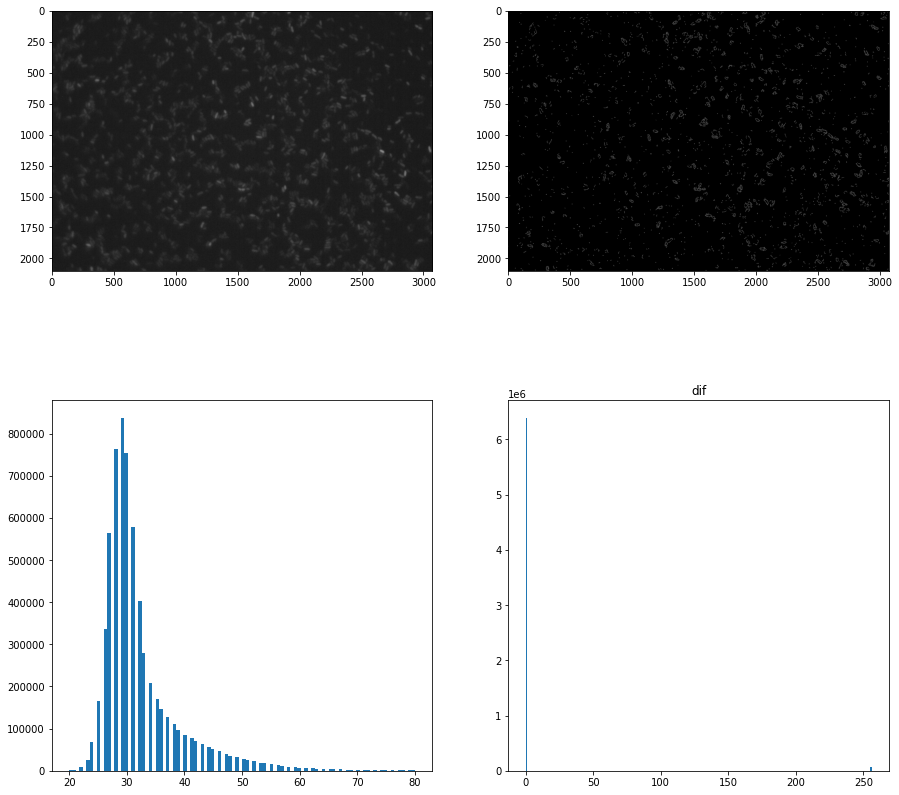

In [18]:
filtered = cv2.Canny(image2, 20, 2*20, 500)
filtered= F.automatic_brightness_and_contrast(filtered, clip_hist_percent=10)[0]
contours = de.find_contours(filtered) # Obtains elements by contours
print(len(contours))
fig, axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title('dif')
axs[0,0].imshow(image2,cmap='gray', vmin=0, vmax=255)
axs[0,1].imshow(filtered,cmap='gray', vmin=0, vmax=255)
axs[1,0].hist(image2.ravel(),100,[20,80])[0][0]
axs[1,1].hist(filtered.ravel(),256,[0,256])[0][0]

In [ ]:
plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3))

In [6]:
import numpy as np
import argparse
import cv2
import sys

target = cv2.imread('/media/leandro/Volumen1TB1/Alt Atlas/images/Human Embryonic Stem Cells and Human Induced Pluripotent Stem Cell Images/Cells/Project_Image001 NC_UCMSC_P5_SS High Glucose.jpg' , cv2.IMREAD_COLOR)
img = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
img = cv2.resize (img,(750,500), interpolation = cv2.INTER_AREA)
mask = dp.binary_mask(img,0.1,k_size=3,iterations=2)
SearchImage = cv2.bitwise_and(target,target,mask = mask)

# cv2.imshow("Search Region" , SearchImage)
# cv2.waitKey()

#convert RGBto Lab
LabImage = cv2.cvtColor(SearchImage,cv2.COLOR_BGR2LAB)

# cv2.imshow("Lab(b)" , LabImage[:, :, 1])
# cv2.waitKey()

ret,Binary = cv2.threshold(LabImage[:, :, 1], 0, 255, cv2.THRESH_OTSU)
# cv2.imshow('win1', Binary)
# cv2.waitKey(0)

 #find contours
contours, hierarchy = cv2.findContours(Binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(target.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

for cnt in contours:

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h

    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    rect_area = w * h
    extent = float(area) / rect_area

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area

    equi_diameter = np.sqrt(4 * area / np.pi)

    (x, y), (MA, ma), Orientation = cv2.fitEllipse(cnt)

    print(" Width = {}  Height = {} area = {}  aspect ration = {}  extent  = {}  solidity = {}   equi_diameter = {}   orientation = {}".format(  w , h , area , 
    aspect_ratio , extent , solidity , equi_diameter , Orientation))



cv2.imshow('win1', img_contours)
cv2.waitKey(0)

error: OpenCV(4.5.4-dev) /tmp/pip-req-build-6qnmwb6g/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [4]:
target

In [25]:
image = ui.readimages_asmatrix(path + 'Project_Image001 NC_UCMSC_P5_SS High Glucose.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
contours = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


area_thresh1 = 500
area_thresh2 = 1000
aspect_thresh1 = 2
aspect_thresh2 = 4
result1 = image.copy()
result2 = image.copy()
for c in contours:

    # get rotated rectangle from contour
    # get its dimensions
    # get angle relative to horizontal from rotated rectangle
#     rotrect = cv2.minAreaRect(c)
    box = cv2.boxPoints(c)
    box = np.int0(box)
    (center), (dim1,dim2), angle = rotrect
    maxdim = max(dim1,dim2)
    mindim = min(dim1,dim2)
    area = dim1 * dim2
    if area > 0:
        aspect = maxdim / mindim
        #print(area, aspect)

    if (area > area_thresh1) and (area < area_thresh2) and (aspect > aspect_thresh1) and (aspect < aspect_thresh2):
        # draw contour on input
        cv2.drawContours(result1,[c],0,(255,255,255),1)
        # draw rectangle on input
        cv2.drawContours(result2,[box],0,(255,255,255),1)
        print(area, aspect)

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'boxPoints'
> Overload resolution failed:
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 1
>  - Can't parse 'box' as RotatedRect. Expected sequence length 3, got 1


In [26]:
c

(array([[[   0,    0]],
 
        [[   0, 2999]],
 
        [[3999, 2999]],
 
        [[3999,    0]]], dtype=int32),)